In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("amazon_sales_full.csv")
df

,Order_ID,Company,Customer_Name,Customer_Age,Customer_Gender,Membership_Type,Customer_Purchase_Frequency,Product,Category,Price,...,Payment_Method,Status,Discount,Holiday_Effect,Shipping_Time,Customer_Lifetime_Value,Product_Rating,Referral_Purchase,Stock_Availability,Customer_Complaints
0,1,Amazon,Sophia Taylor,52,Female,Regular,6,Smartwatch,Accessories,304.68,...,PayPal,Cancelled,20,New Year,2,1828.08,3,No,Out of Stock,2
1,2,Amazon,Noah White,23,Male,Regular,48,Tablet,Electronics,1460.05,...,Cash on Delivery,Returned,5,New Year,9,350412.00,3,No,Out of Stock,0
2,3,Amazon,Noah White,54,Female,Regular,13,Sunglasses,Accessories,1925.56,...,PayPal,Completed,5,Christmas,10,100129.12,4,Yes,Out of Stock,5
3,4,Amazon,Liam Johnson,52,Female,Business,14,Book,Books,1679.27,...,Cash on Delivery,Pending,0,Cyber Monday,5,47019.56,4,Yes,Out of Stock,0
4,5,Amazon,Jane Smith,47,Female,Business,7,Desk Chair,Furniture,712.09,...,PayPal,Completed,0,New Year,2,19938.52,1,Yes,Out of Stock,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69996,Amazon,Michael Brown,35,Male,Business,33,Gaming Console,Electronics,1607.52,...,PayPal,Returned,10,Christmas,10,265240.80,3,No,In Stock,5
69996,69997,Amazon,Liam Johnson,38,Male,Prime,30,Sneakers,Footwear,1665.71,...,Cash on Delivery,Completed,20,Christmas,2,99942.60,4,No,In Stock,3
69997,69998,Amazon,Emma Harris,51,Female,Prime,5,Gaming Console,Electronics,1372.68,...,PayPal,Pending,15,Cyber Monday,9,13726.80,1,No,Out of Stock,5
69998,69999,Amazon,Michael Brown,50,Male,Business,37,Gaming Console,Electronics,1645.26,...,Bank Transfer,Returned,20,Black Friday,3,304373.10,4,Yes,In Stock,5


In [3]:
print(df.head())

   Order_ID Company  Customer_Name  Customer_Age Customer_Gender  \
0         1  Amazon  Sophia Taylor            52          Female   
1         2  Amazon     Noah White            23            Male   
2         3  Amazon     Noah White            54          Female   
3         4  Amazon   Liam Johnson            52          Female   
4         5  Amazon     Jane Smith            47          Female   

  Membership_Type  Customer_Purchase_Frequency     Product     Category  \
0         Regular                            6  Smartwatch  Accessories   
1         Regular                           48      Tablet  Electronics   
2         Regular                           13  Sunglasses  Accessories   
3        Business                           14        Book        Books   
4        Business                            7  Desk Chair    Furniture   

     Price  ...    Payment_Method     Status Discount Holiday_Effect  \
0   304.68  ...            PayPal  Cancelled       20       New Year

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Order_ID                     70000 non-null  int64  
 1   Company                      70000 non-null  object 
 2   Customer_Name                70000 non-null  object 
 3   Customer_Age                 70000 non-null  int64  
 4   Customer_Gender              70000 non-null  object 
 5   Membership_Type              70000 non-null  object 
 6   Customer_Purchase_Frequency  70000 non-null  int64  
 7   Product                      70000 non-null  object 
 8   Category                     70000 non-null  object 
 9   Price                        70000 non-null  float64
 10  Quantity                     70000 non-null  int64  
 11  Total_Sales                  70000 non-null  float64
 12  Order_Date                   70000 non-null  object 
 13  Region          

In [5]:
df.describe()

,Order_ID,Customer_Age,Customer_Purchase_Frequency,Price,Quantity,Total_Sales,Discount,Shipping_Time,Customer_Lifetime_Value,Product_Rating,Customer_Complaints
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,35000.500000,41.562486,25.484286,1006.449004,3.001414,3017.018806,10.047429,5.498329,76886.593427,2.999414,2.501557
std,20207.403759,13.852556,14.434552,574.759965,1.418354,2380.364917,7.080146,2.862866,82256.894427,1.412500,1.705951
min,1.000000,18.000000,1.000000,10.050000,1.000000,10.060000,0.000000,1.000000,15.800000,1.000000,0.000000
25%,17500.750000,30.000000,13.000000,507.525000,2.000000,1111.287500,5.000000,3.000000,17083.637500,2.000000,1.000000
50%,35000.500000,42.000000,26.000000,1007.315000,3.000000,2356.050000,10.000000,6.000000,47319.235000,3.000000,3.000000
75%,52500.250000,54.000000,38.000000,1503.000000,4.000000,4466.175000,15.000000,8.000000,108680.482500,4.000000,4.000000
max,70000.000000,65.000000,50.000000,1999.960000,5.000000,9999.800000,20.000000,10.000000,494250.000000,5.000000,5.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
print(df.describe(include=['object']))

       Company Customer_Name Customer_Gender Membership_Type   Product  \
count    70000         70000           70000           70000     70000   
unique       1            10               2               3        15   
top     Amazon  Chris Wilson            Male         Regular  Backpack   
freq     70000          7108           35097           23439      4754   

           Category Order_Date Region Payment_Method   Status Holiday_Effect  \
count         70000      70000  70000          70000    70000          56086   
unique            7        336      5              4        4              4   
top     Electronics  1/28/2024   Asia         PayPal  Pending      Christmas   
freq          27912        253  14158          17690    17596          14129   

       Referral_Purchase Stock_Availability  
count              70000              70000  
unique                 2                  2  
top                   No       Out of Stock  
freq               35152              35002 

In [8]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Date']

0       2024-01-16
1       2024-12-25
2       2024-03-10
3       2024-10-20
4       2024-04-19
           ...    
69995   2024-04-07
69996   2024-08-12
69997   2024-01-07
69998   2024-02-14
69999   2024-09-17
Name: Order_Date, Length: 70000, dtype: datetime64[ns]

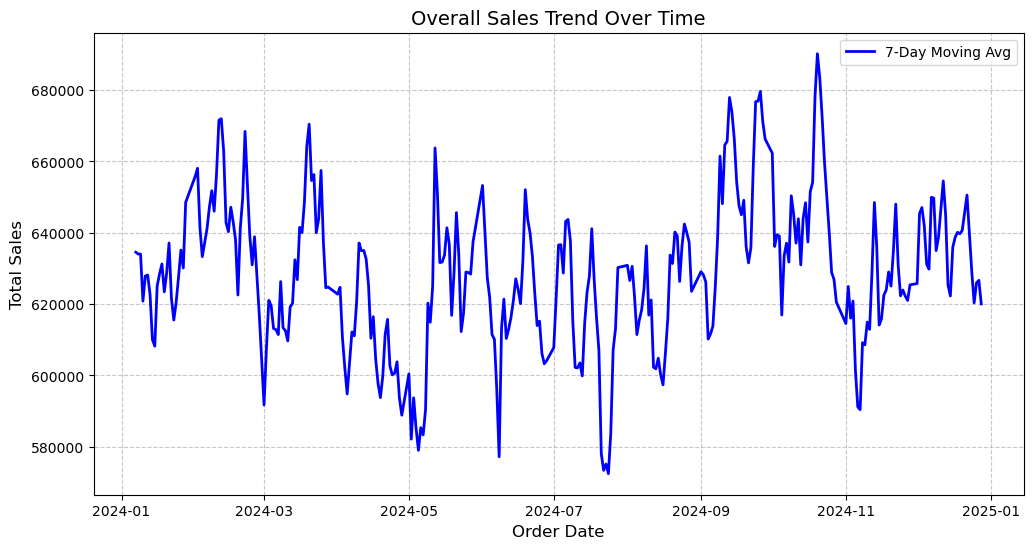

In [9]:
sales_trend = df.groupby('Order_Date')['Total_Sales'].sum().reset_index()
sales_trend['Smoothed_Sales'] = sales_trend['Total_Sales'].rolling(window=7).mean()  # 7-day moving average
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['Order_Date'], sales_trend['Smoothed_Sales'], color='blue', linewidth=2, label="7-Day Moving Avg")
plt.title('Overall Sales Trend Over Time', fontsize=14)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

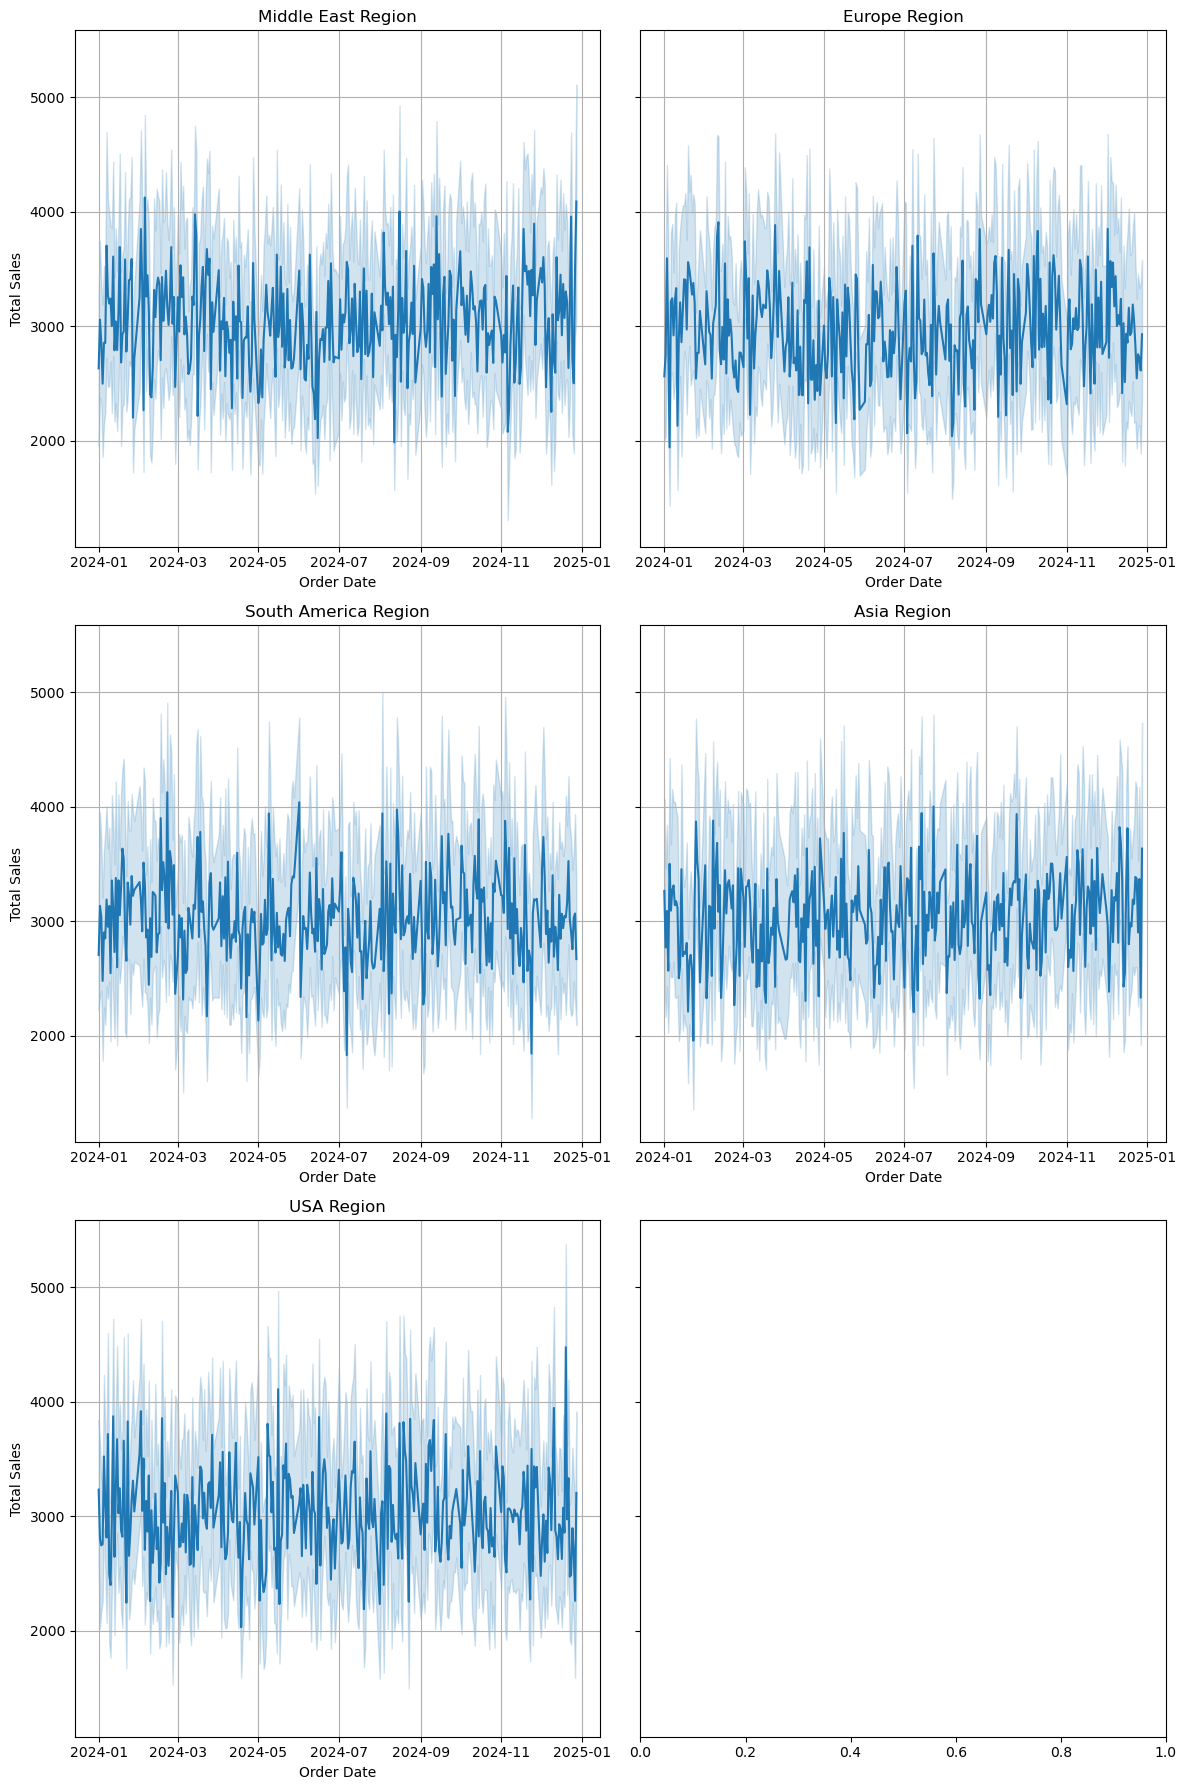

In [10]:
# Sales Trend by Region
regions = df['Region'].unique()
num_regions = len(regions)
num_rows = (num_regions + 1) // 2  
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows), sharey=True)
axes = axes.flatten()
for ax, region in zip(axes, regions):
    region_data = df[df['Region'] == region]
    sns.lineplot(data=region_data, x='Order_Date', y='Total_Sales', ax=ax)
    ax.set_title(f'{region} Region')
    ax.set_xlabel('Order Date')
    ax.set_ylabel('Total Sales')
    ax.grid(True)
plt.tight_layout()
plt.show()


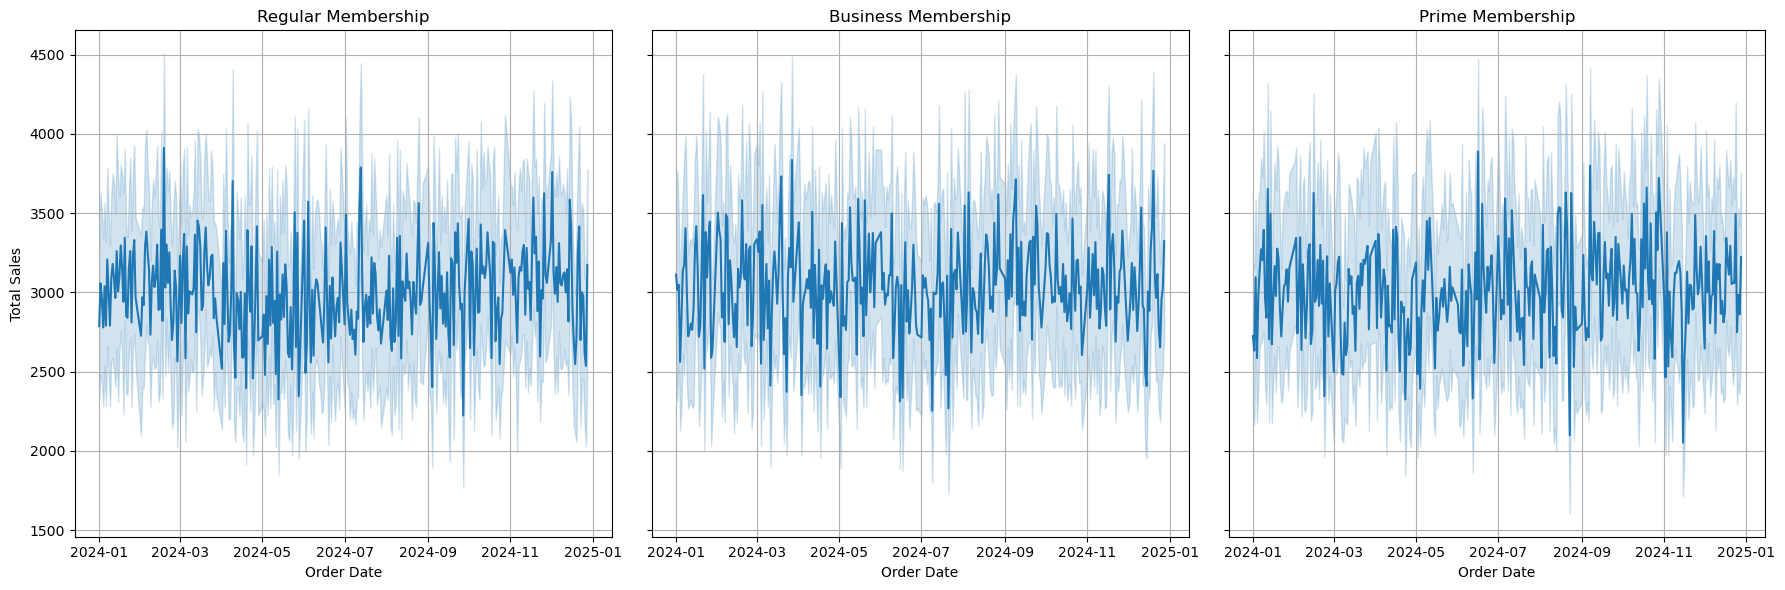

In [11]:
# Sales Trend by Membership Type
memberships = df['Membership_Type'].unique()
num_memberships = len(memberships)
fig, axes = plt.subplots(nrows=1, ncols=num_memberships, figsize=(6 * num_memberships, 6), sharey=True)
for ax, membership in zip(axes, memberships):
    membership_data = df[df['Membership_Type'] == membership]
    sns.lineplot(data=membership_data, x='Order_Date', y='Total_Sales', ax=ax)
    ax.set_title(f'{membership} Membership')
    ax.set_xlabel('Order Date')
    ax.set_ylabel('Total Sales')
    ax.grid(True)
plt.tight_layout()
plt.show()


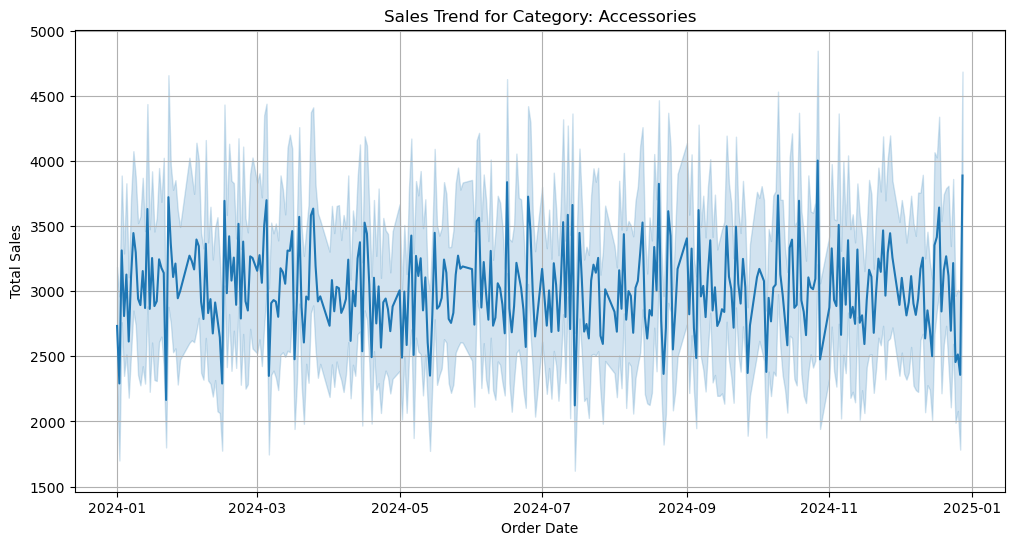

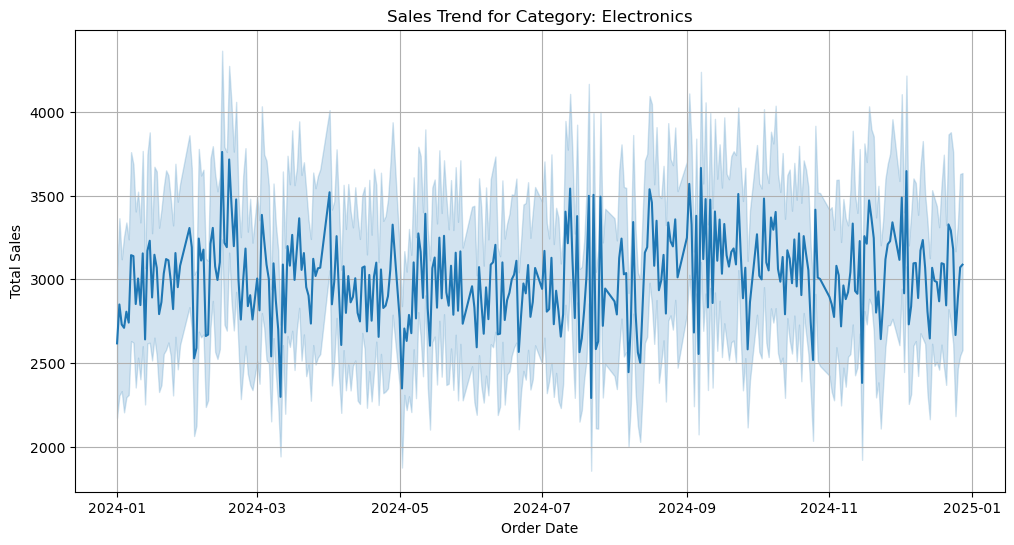

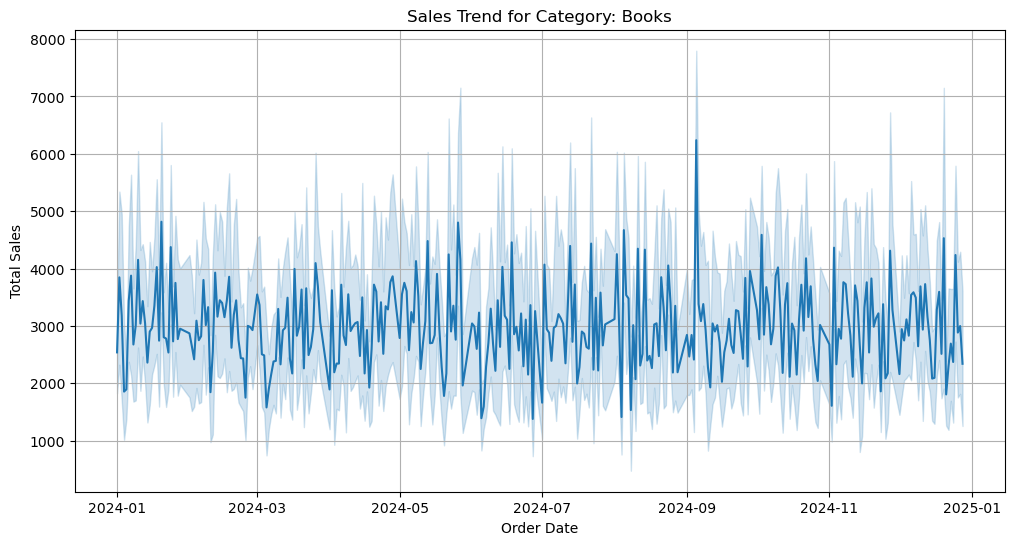

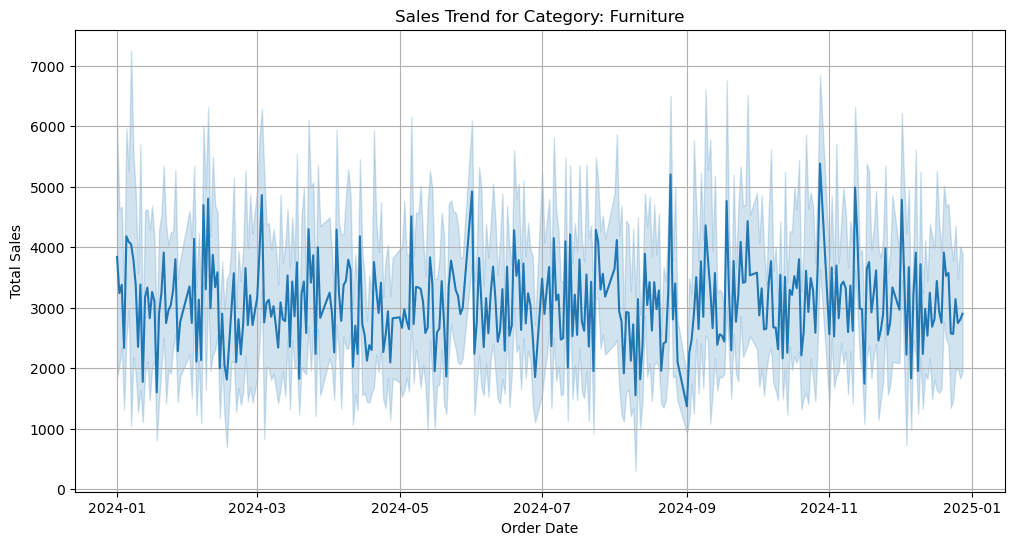

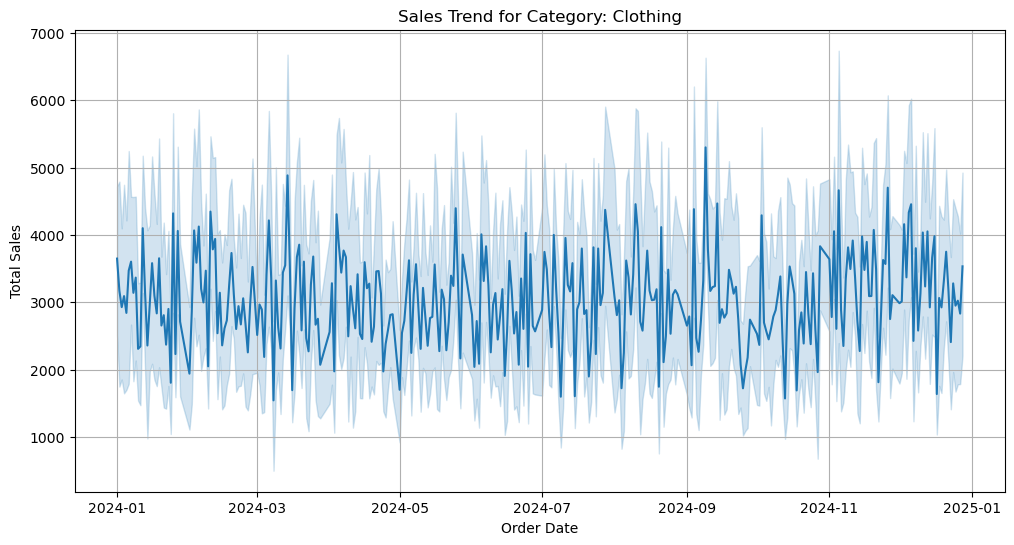

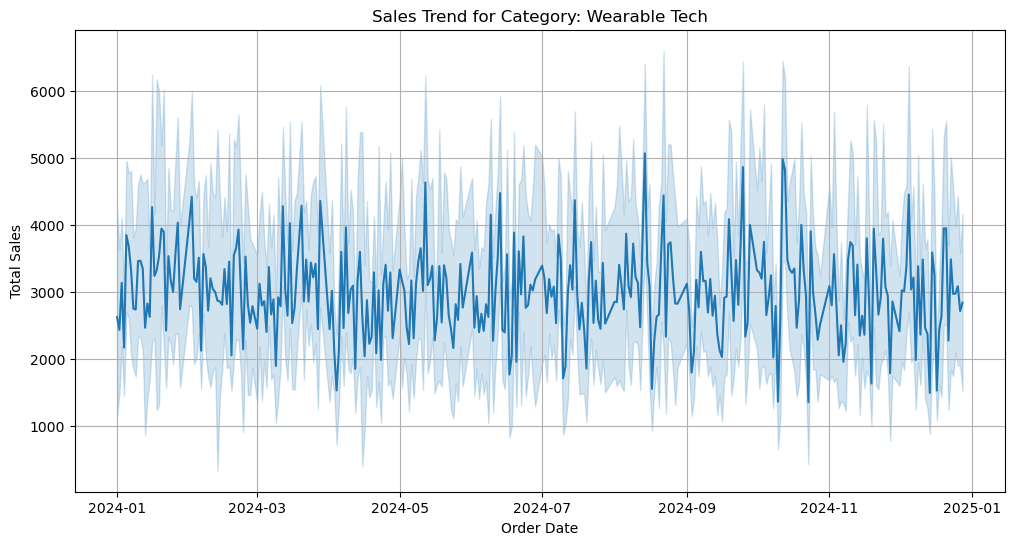

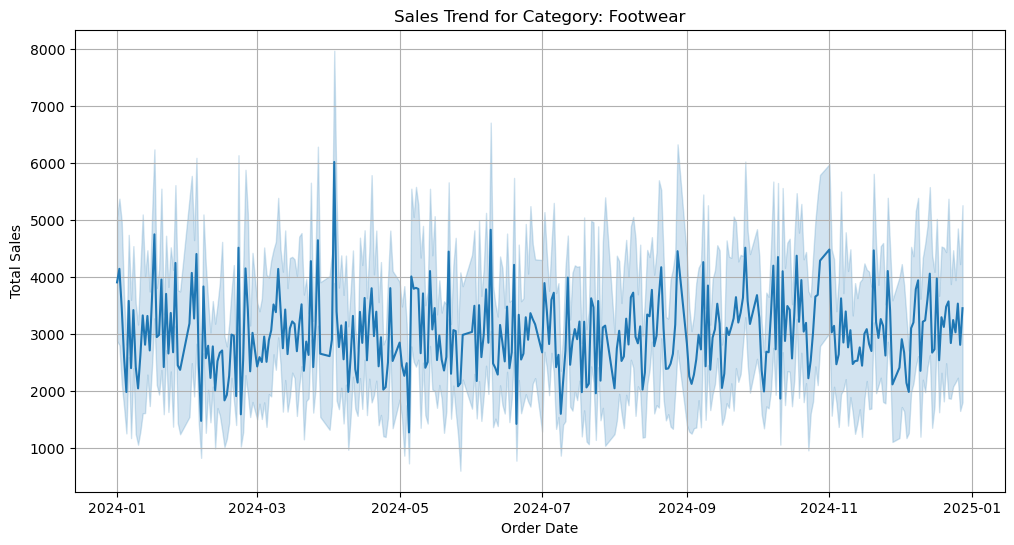

In [12]:
# Sales Trend by Category
for category in df['Category'].unique():
    plt.figure(figsize=(12, 6))
    subset = df[df['Category'] == category]
    sns.lineplot(data=subset, x='Order_Date', y='Total_Sales')
    plt.title(f'Sales Trend for Category: {category}')
    plt.xlabel('Order Date')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()

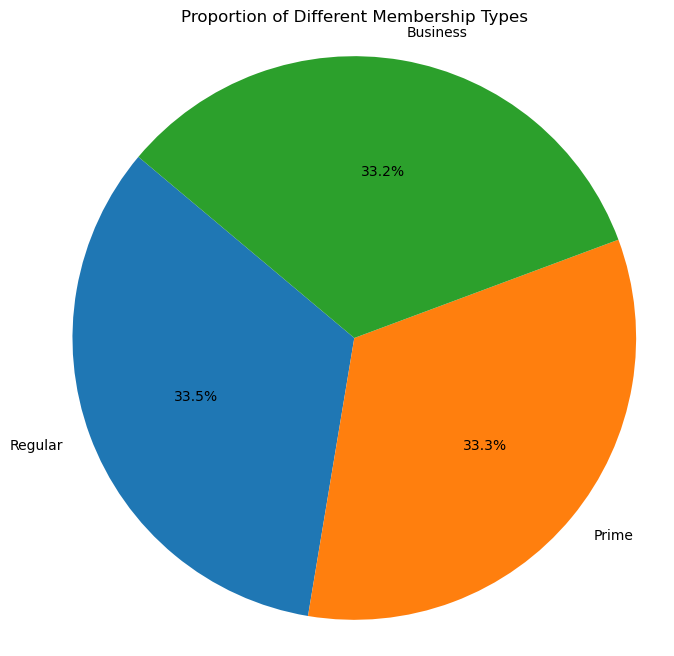

In [13]:
membership_counts = df['Membership_Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(membership_counts, labels=membership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different Membership Types')
plt.axis('equal')
plt.show()


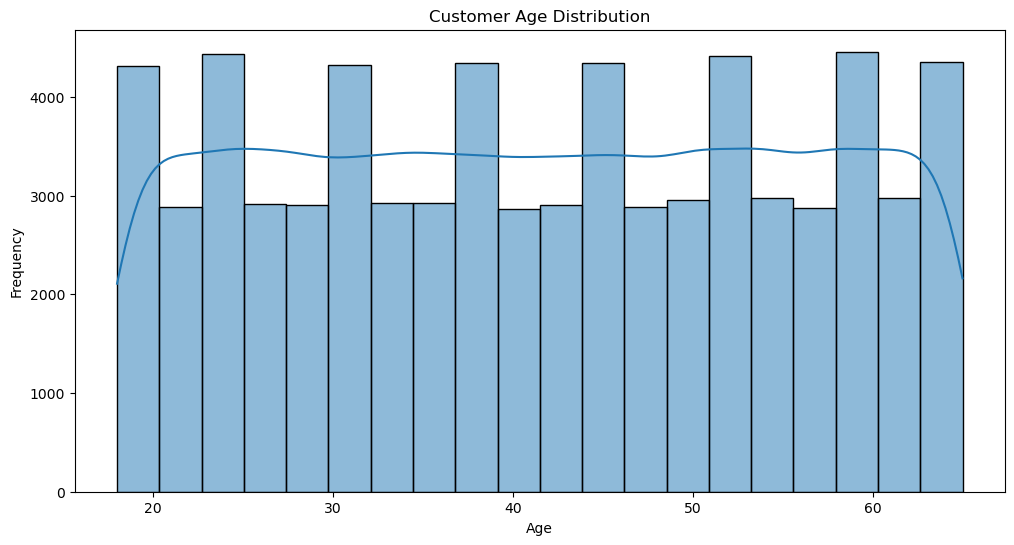

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [15]:

discount_sales = df.groupby('Discount')['Total_Sales'].mean().reset_index()
fig = px.line(
    discount_sales,
    x='Discount',
    y='Total_Sales',
    markers=True,
    title='Effect of Discounts on Total Sales',
    labels={'Discount': 'Discount (%)', 'Total_Sales': 'Average Total Sales'}
)

fig.show()


In [16]:

complaints_by_shipping_time = df.groupby(['Shipping_Time', 'Region'])['Customer_Complaints'].mean().reset_index()


fig = px.line(
    complaints_by_shipping_time,
    x='Shipping_Time',
    y='Customer_Complaints',
    color='Region',
    markers=True,
    title='Shipping Time vs. Customer Complaints by Region',
    labels={'Shipping_Time': 'Shipping Time (Days)', 'Customer_Complaints': 'Average Number of Complaints'}
)

fig.show()


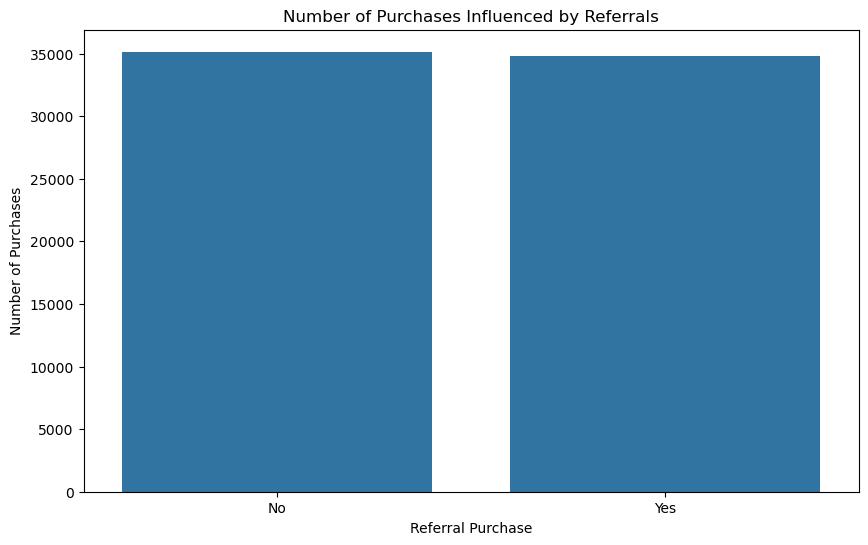

In [17]:

referral_purchases = df['Referral_Purchase'].value_counts().reset_index()
referral_purchases.columns = ['Referral_Purchase', 'Count']

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=referral_purchases, x='Referral_Purchase', y='Count')
plt.title('Number of Purchases Influenced by Referrals')
plt.xlabel('Referral Purchase')
plt.ylabel('Number of Purchases')
plt.show()


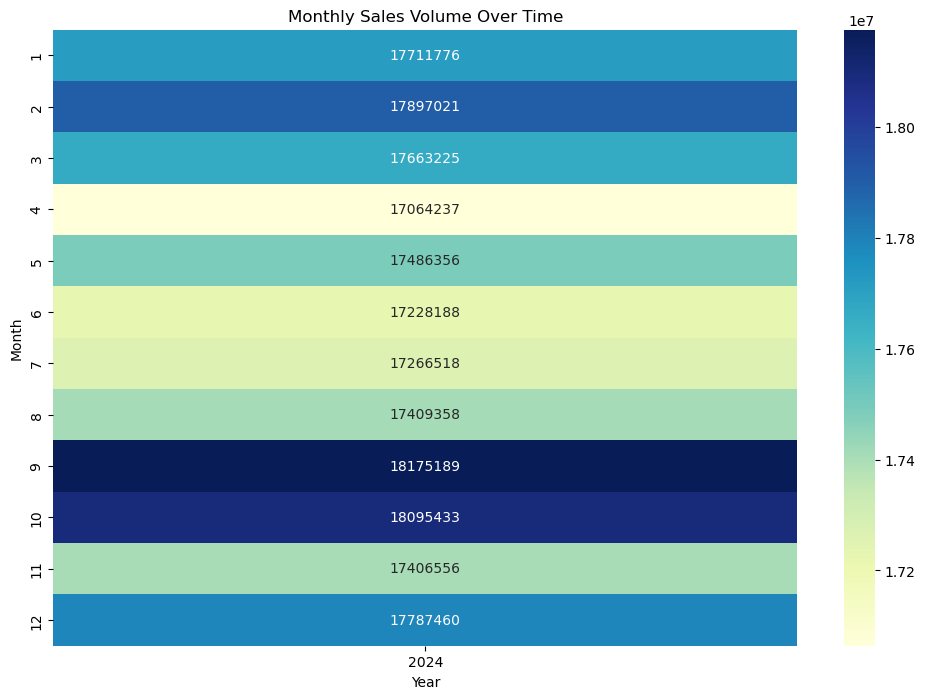

In [18]:
df['Month'] = df['Order_Date'].dt.month
df['Year'] = df['Order_Date'].dt.year

monthly_sales = df.groupby(['Year', 'Month'])['Total_Sales'].sum().unstack(level=0).fillna(0)


plt.figure(figsize=(12, 8))
sns.heatmap(monthly_sales, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Monthly Sales Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


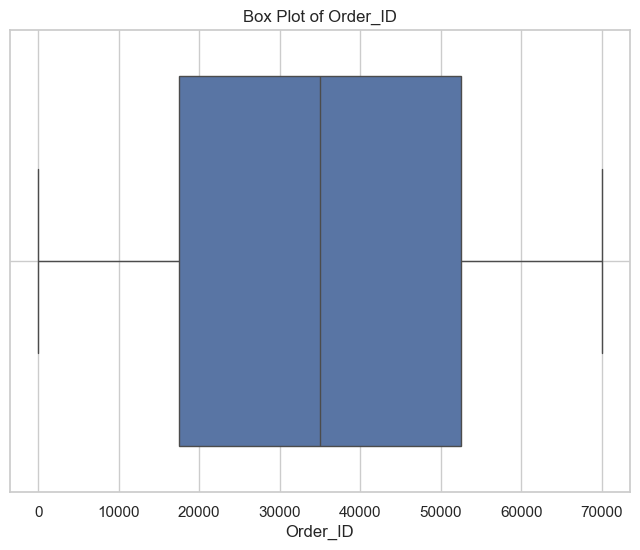

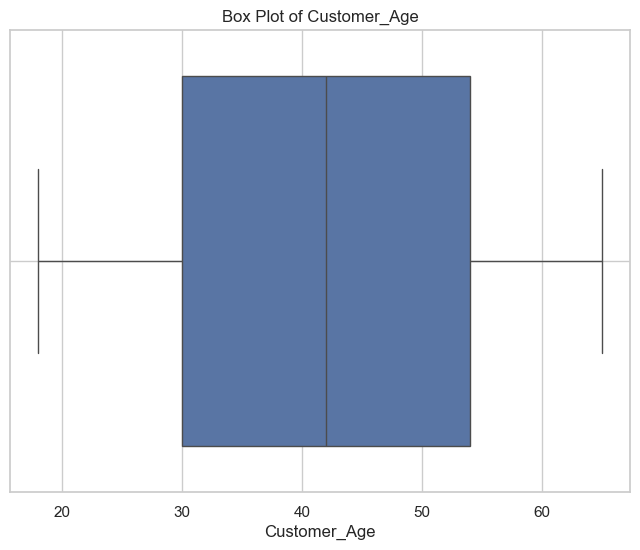

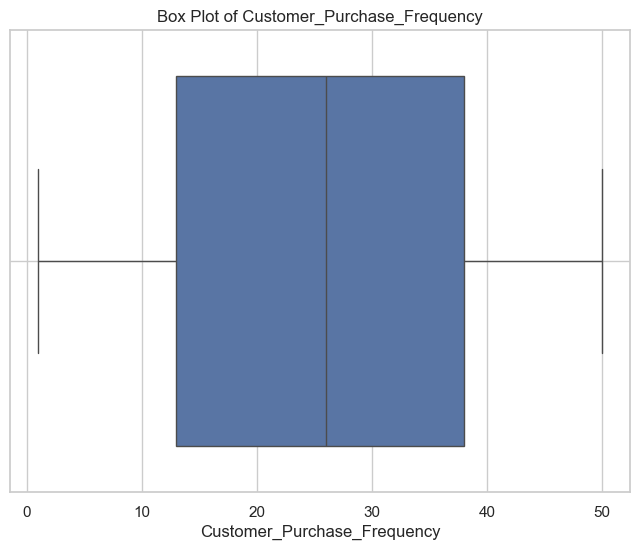

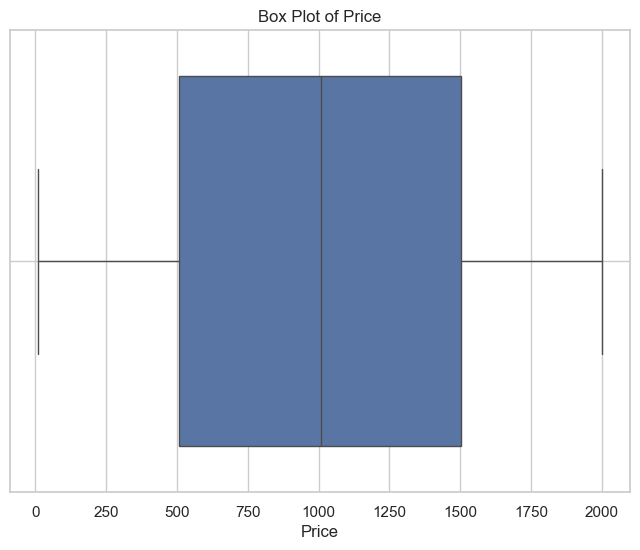

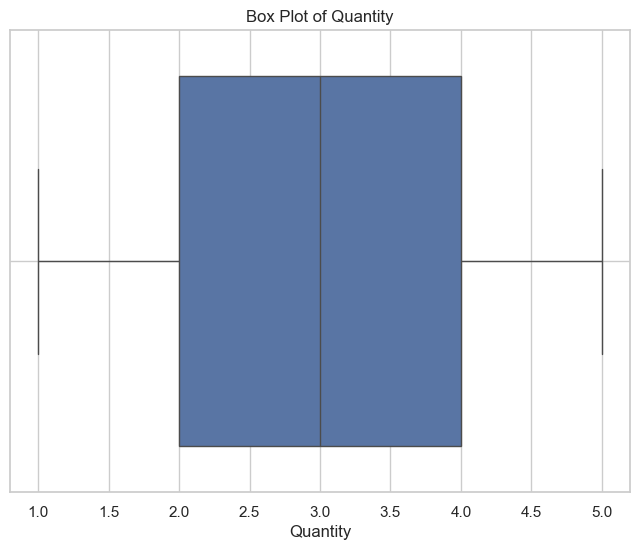

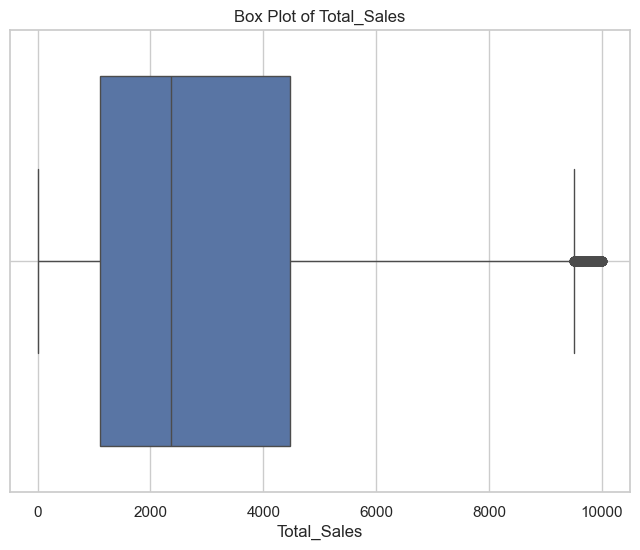

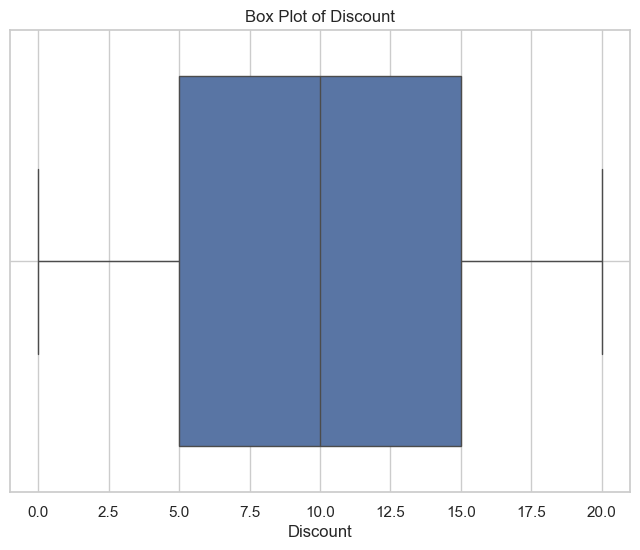

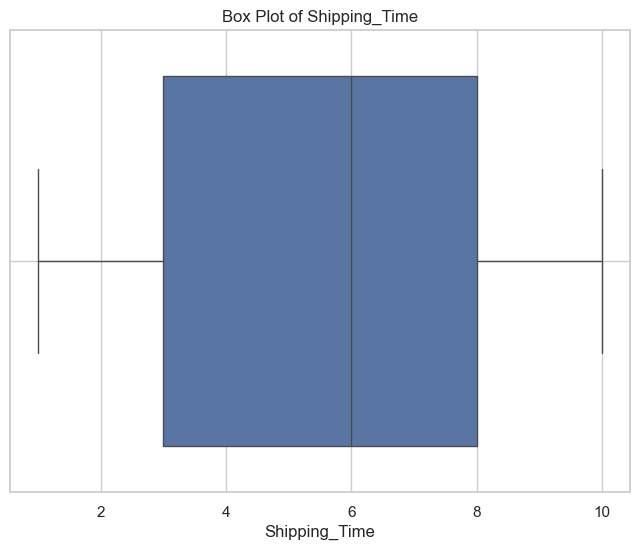

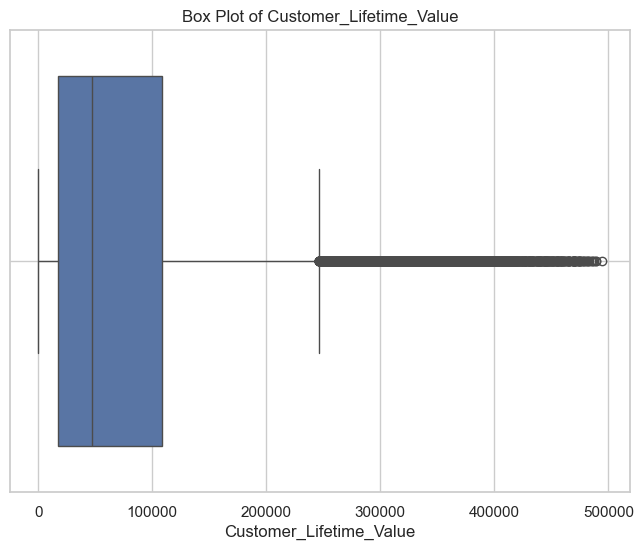

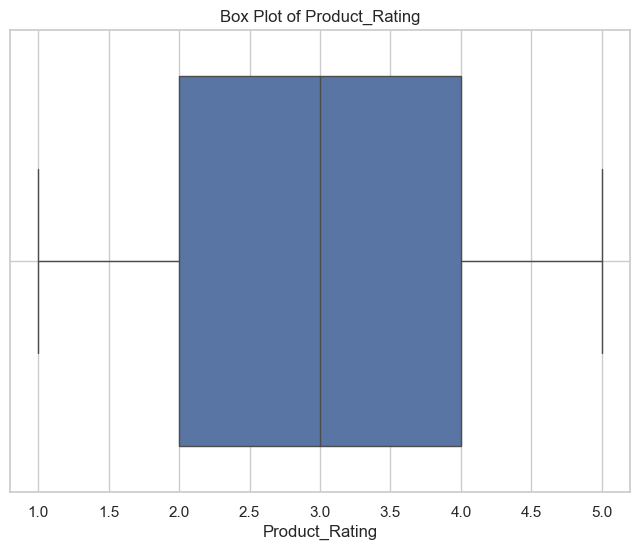

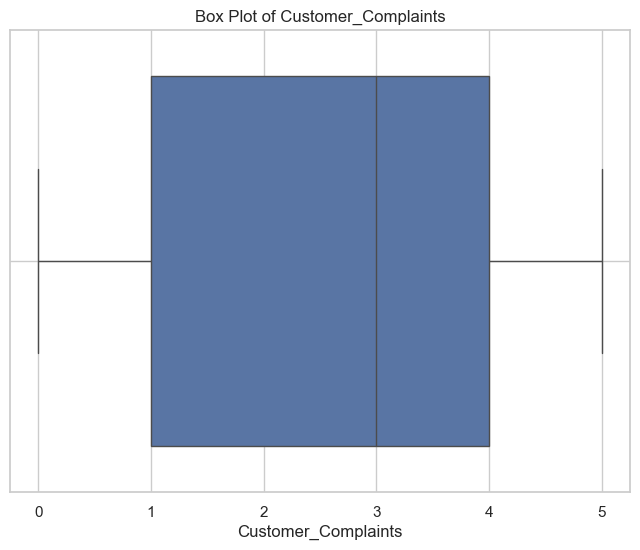

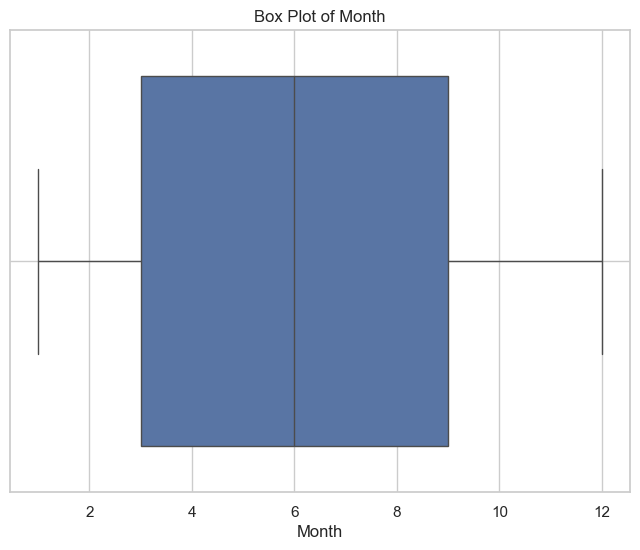

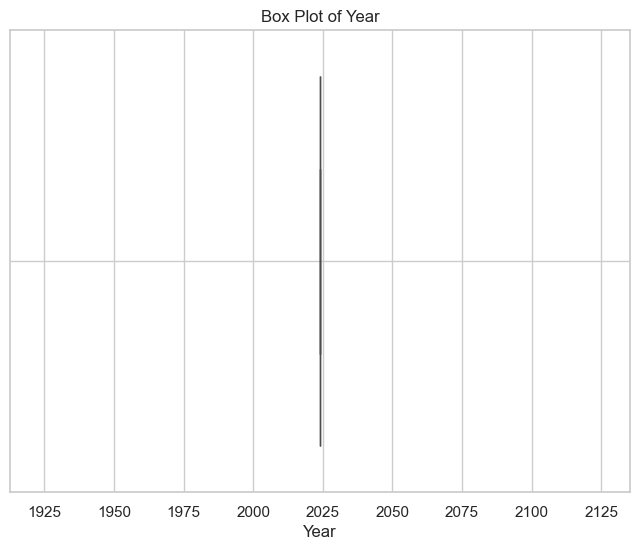

In [19]:
sns.set(style="whitegrid")

# Plotting box plots for numerical columns
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])  
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    
 
 
    
    plt.grid(True)  
    plt.show()

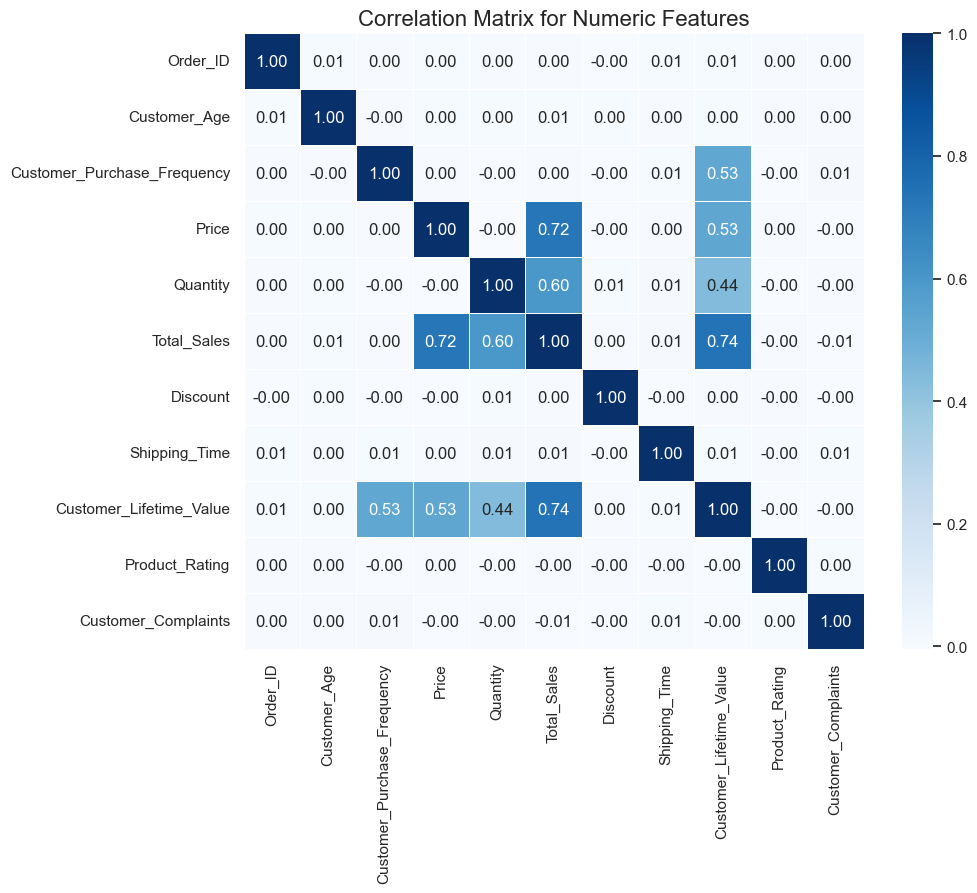

In [20]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)

# Set title and labels
plt.title('Correlation Matrix for Numeric Features', size=16)
plt.show()


In [21]:
df['Stock_Availability'] = df['Stock_Availability'].map({'In Stock': 1, 'Out of Stock': 0})
df[['Stock_Availability']].head()

,Stock_Availability
0,0
1,0
2,0
3,0
4,0


In [24]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')
    
df    

,Order_ID,Company,Customer_Name,Customer_Age,Customer_Gender,Membership_Type,Customer_Purchase_Frequency,Product,Category,Price,...,Discount,Holiday_Effect,Shipping_Time,Customer_Lifetime_Value,Product_Rating,Referral_Purchase,Stock_Availability,Customer_Complaints,Month,Year
0,1,Amazon,Sophia Taylor,52,Female,Regular,6,Smartwatch,Accessories,304.68,...,20,New Year,2,1828.08,3,No,0,2,1,2024
1,2,Amazon,Noah White,23,Male,Regular,48,Tablet,Electronics,1460.05,...,5,New Year,9,350412.00,3,No,0,0,12,2024
2,3,Amazon,Noah White,54,Female,Regular,13,Sunglasses,Accessories,1925.56,...,5,Christmas,10,100129.12,4,Yes,0,5,3,2024
3,4,Amazon,Liam Johnson,52,Female,Business,14,Book,Books,1679.27,...,0,Cyber Monday,5,47019.56,4,Yes,0,0,10,2024
4,5,Amazon,Jane Smith,47,Female,Business,7,Desk Chair,Furniture,712.09,...,0,New Year,2,19938.52,1,Yes,0,2,4,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69996,Amazon,Michael Brown,35,Male,Business,33,Gaming Console,Electronics,1607.52,...,10,Christmas,10,265240.80,3,No,1,5,4,2024
69996,69997,Amazon,Liam Johnson,38,Male,Prime,30,Sneakers,Footwear,1665.71,...,20,Christmas,2,99942.60,4,No,1,3,8,2024
69997,69998,Amazon,Emma Harris,51,Female,Prime,5,Gaming Console,Electronics,1372.68,...,15,Cyber Monday,9,13726.80,1,No,0,5,1,2024
69998,69999,Amazon,Michael Brown,50,Male,Business,37,Gaming Console,Electronics,1645.26,...,20,Black Friday,3,304373.10,4,Yes,1,5,2,2024
